## Matplotlib Project: Visualizing the Weather Dataset
#### Problem Statement
We'll continue working with the weather dataset used in the previous project. We will further analyze the dataset and identify any trend using the Matplotlib library. The index of the dataset is the Date/Time instance at a gap of one hour in the year 2012.

#### About the Dataset-
Snapshot of the Dataset:

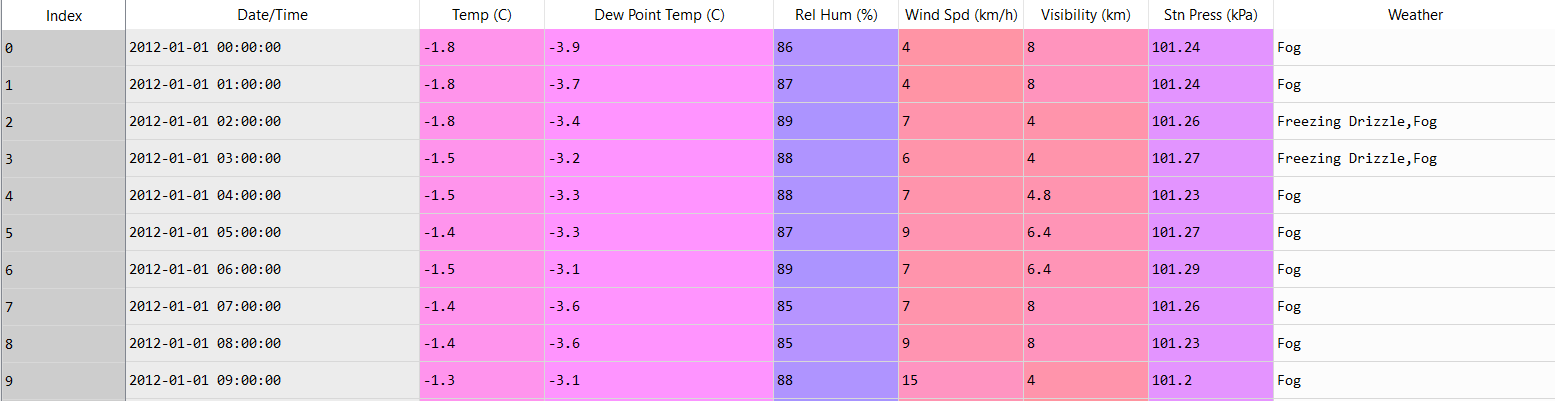

##### Features:
| Name | Description |
|:----:|:-----------:|
Date/Time | Date & Time for each hour in the year 2012.
Temp(C) | Exact temperature at a given time.
Dew Point Temp(C) | Dew Point Temp at a given time. It is the temperature to which air must be cooled to become saturated with water vapor.
Rel Hum (%) | Relative Humidity at a given time.
Wind Spd (km/h) | Wind Speed in km/h at a given time.
Visibility (km) | Visibility in km at a given time.
Stn Press (kPa) | Station Pressure observed at that time.
Weather | Weather at a given time.

### Instructions
Different functions that you would require to define for this project has been mentioned in the code block. All the parameters and the task, a function would do, have been mentioned there.
* Load the `weather_2012` data csv file and store it in `weather_df` variable. The path of the dataset has been stored in the variable `path` for you.
* Check the categorical and numerical variables.
* With the help of a line chart, visualize the monthly trend in the temperature. Call the `line_chart()` to do the same.
You should get a trend similar to the below.

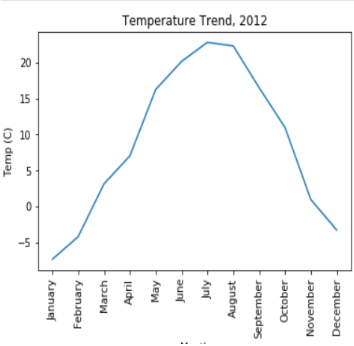

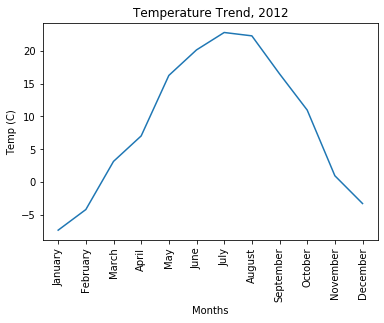

In [1]:
# Import the required Libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Generate a line chart that visualizes the readings in the months

def line_chart(df, period, col):
    """ A line chart that visualizes the readings in the months
    
    This function accepts the dataframe df, period (day/month/year) and col(feature), which plots the aggregated value of the 
    feature based on the periods. Ensure the period labels are properly named.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    period - Period of time over which you want to aggregate the data
    col - Feature of the dataframe
    """
    mths = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 
            'December']
    period = pd.to_datetime(period).strftime('%B')
    agg_val = df.groupby(period)[[col]].mean()
    agg_val = agg_val.reindex(mths)
    plt.plot(agg_val.index, agg_val)
    plt.xlabel('Months')
    plt.ylabel('Temp (C)')
    plt.title('Temperature Trend, 2012')
    plt.xticks(rotation = 90) 
    return
  
    
# Read the Data and pass the parameter as parse_dates=True, index_col='Date/Time'
weather_df = pd.read_csv(PATH, parse_dates=True, index_col='Date/Time')

# Lets try to generate a line chart that visualizes the temperature readings in the months.
# Call the function line_chart() with the appropriate parameters.
line_chart(weather_df, weather_df.index, 'Temp (C)')


* Visualize the distribution of the different features of your interest. Call the `plot_categorical_columns()` and `plot_cont()` to do the plot.
The distribution of the numerical columns should be similar to below.

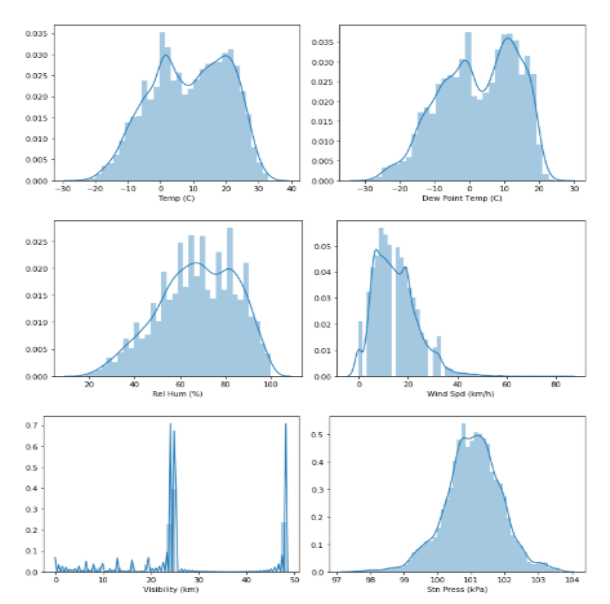

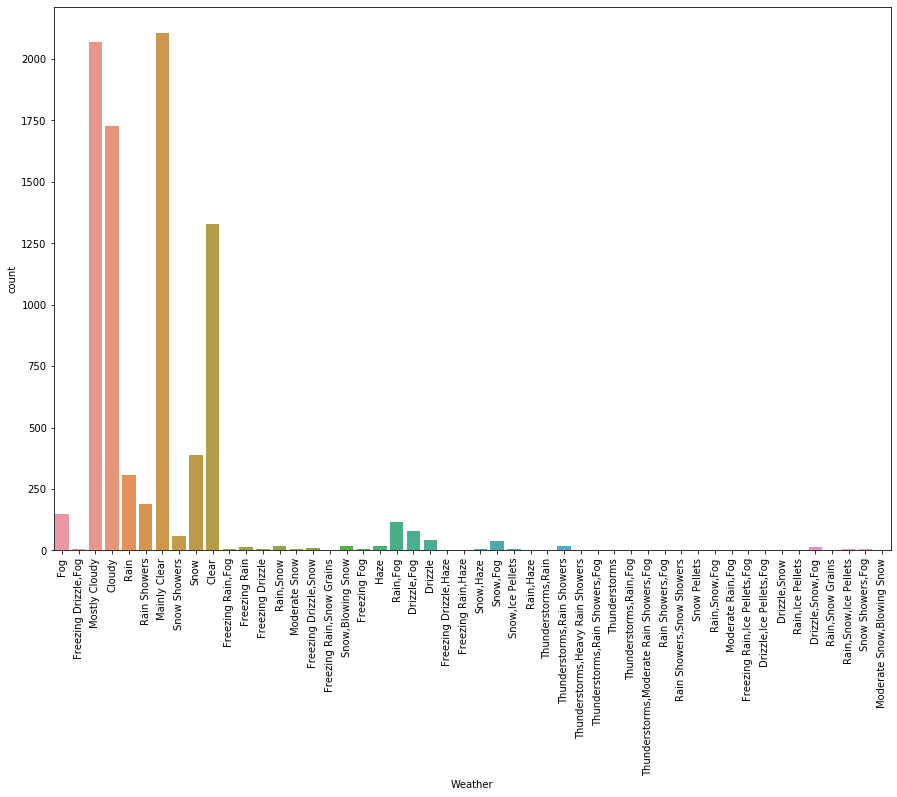

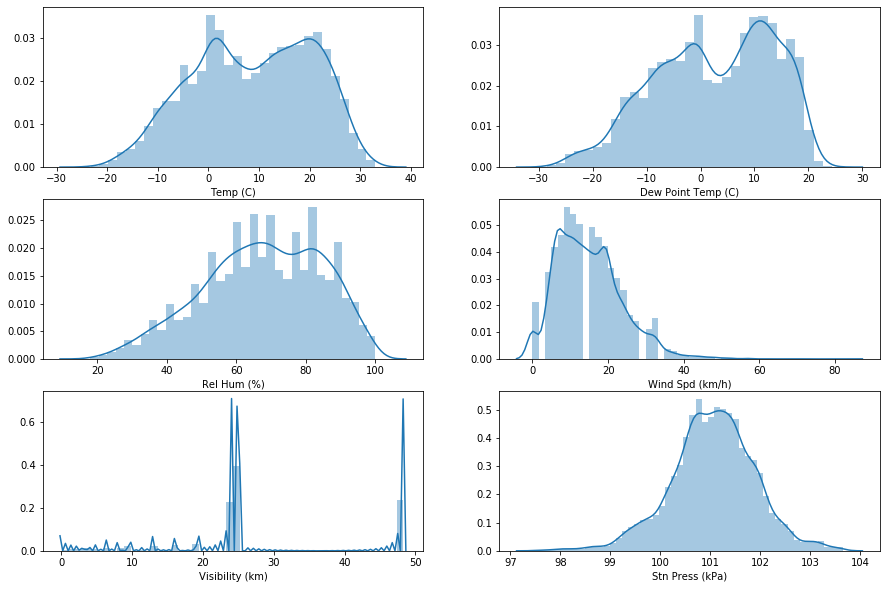

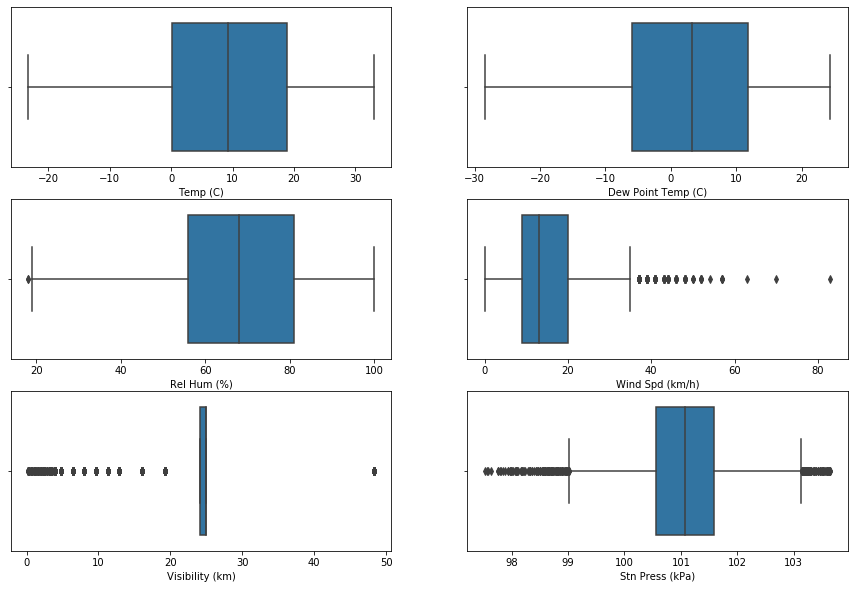

In [2]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(df):
    """ Univariate analysis of categorical columns
    
    This function accepts the dataframe df which analyzes all the variable in the data and performs the univariate 
    analysis using bar plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    """
    cat = df.select_dtypes(include = 'object')
    plt.figure(figsize=(15,10))
    sns.countplot(x = 'Weather', data = cat)
    plt.xticks(rotation = 90)
    plt.show()
    return
    

# Function to plot continous plots
def plot_cont(df, plt_typ):
    """ Univariate analysis of Numerical columns
    
    This function accepts the dataframe df, plt_type (boxplot/distplot) which analyzes all the variable in the data 
    and performs the univariate analysis using boxplot or distplot plot.
    
    Keyword arguments:
    df - Pandas dataframe which has the data.
    plt_type - type of plot through which you want to visualize the data
    """
    nc = df.select_dtypes(include = 'number')
    fig, ((ax_1, ax_2), (ax_3, ax_4), (ax_5, ax_6)) = plt.subplots(3,2, figsize=(15,10) )
    
    if plt_typ == 'boxplot':
        sns.boxplot(nc["Temp (C)"], ax = ax_1)
        sns.boxplot(nc["Dew Point Temp (C)"], ax = ax_2)
        sns.boxplot(nc["Rel Hum (%)"], ax = ax_3)
        sns.boxplot(nc["Wind Spd (km/h)"], ax = ax_4)
        sns.boxplot(nc["Visibility (km)"], ax = ax_5)
        sns.boxplot(nc["Stn Press (kPa)"], ax = ax_6)
    if plt_typ == 'distplot':
        sns.distplot(nc["Temp (C)"], ax = ax_1)
        sns.distplot(nc["Dew Point Temp (C)"], ax = ax_2)
        sns.distplot(nc["Rel Hum (%)"], ax = ax_3)
        sns.distplot(nc["Wind Spd (km/h)"], ax = ax_4)
        sns.distplot(nc["Visibility (km)"], ax = ax_5)
        sns.distplot(nc["Stn Press (kPa)"], ax = ax_6)
    return


# Now let's perform the univariate analysis of categorical features.
# Call the "function plot_categorical_columns()" with appropriate parameters.
plot_categorical_columns(weather_df)

# Let's plot the Univariate analysis of Numerical columns.
# Call the function "plot_cont()" with the appropriate parameters to plot distplot
plot_cont(weather_df, 'distplot')

# Call the function "plot_cont()" with the appropriate parameters to plot boxplot
plot_cont(weather_df, 'boxplot')


* Groupby the data by `Weather` and plot the graph of the mean `Visibility (km)` during different weathers. Call the function `group_values()` to plot the graph.
The mean `Visibility (km)` during different `Weathers` is shown by the below graph.

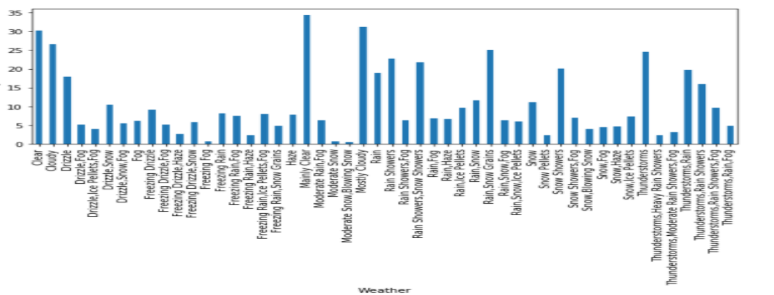

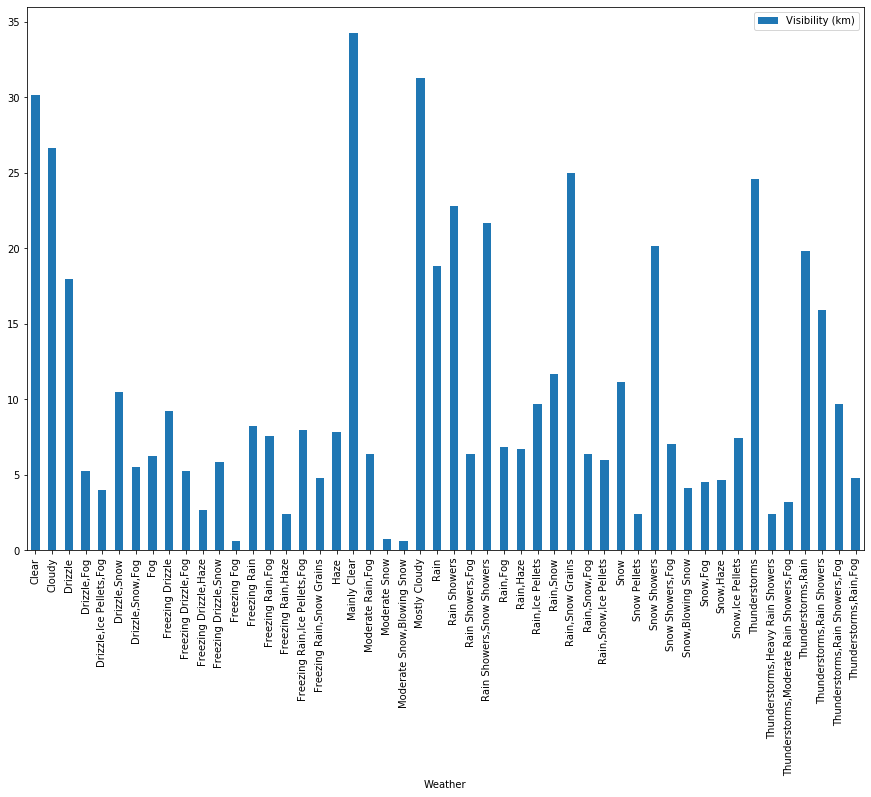

In [3]:
# Function to plot grouped values based on the feature
def group_values(df, col1, agg1, col2):
    """ Agrregate values by grouping
    
    This function accepts a dataframe, 2 column (feature) and aggregated function (agg1) which groupby the dataframe based 
    on the column and plots the bar plot.
   
    Keyword arguments:
    df - Pandas dataframe which has the data.
    col1 - Feature of the dataframe on which values will be aggregated.
    agg1 - Dictionary of aggregate functions with feature as the key and func as the value
    col2 - Feature of the dataframe to be plot against grouped data.
    
    Returns:
    grouping - Dataframe with all columns on which it is grouped on.
    """
    aggregate = {'mean':np.mean,'max':np.max,'min':np.min,'sum':np.sum,'len':len}
    grouping = df.groupby(col1)[[col2]].agg(aggregate[agg1])
    return grouping
    
# Groupby the data by Weather and plot the graph of the mean visibility during different weathers. 
# Call the function group_values to plot the graph.
# Feel free to try on diffrent features and aggregated functions like max, min.
a = group_values(weather_df, 'Weather', 'mean', 'Visibility (km)')
a.plot( kind = 'bar', figsize=(15,10) )
plt.show()
